In [19]:
import torch
import numpy as np
from torch import nn
from torch import optim
import os

import torch.nn.functional as F
from torchvision import datasets ,transforms, models
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [20]:
data_dir='data/train'

test_transforms=transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),])


In [21]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model=torch.load('classifymodel.pth')
model.eval()



cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
def predict_image(image):
    image_tensor=test_transforms(image).float()
    image_tensor=image_tensor.unsqueeze_(0)
    input= Variable(image_tensor).to(device)
    output=model(input)
    
    index=output.data.cpu().numpy().argmax()
    return index

    

In [30]:
def get_random_images(num):
    data=datasets.ImageFolder(data_dir, transform=test_transforms)
    classes=data.classes
    indices= list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    
    loader= torch.utils.data.DataLoader(data, sampler=sampler, 
                                        batch_size=num)
    dataiter=iter(loader)
    images,labels=dataiter.next()
    return images, labels,classes
    
    
    

NameError: name 'testloader' is not defined

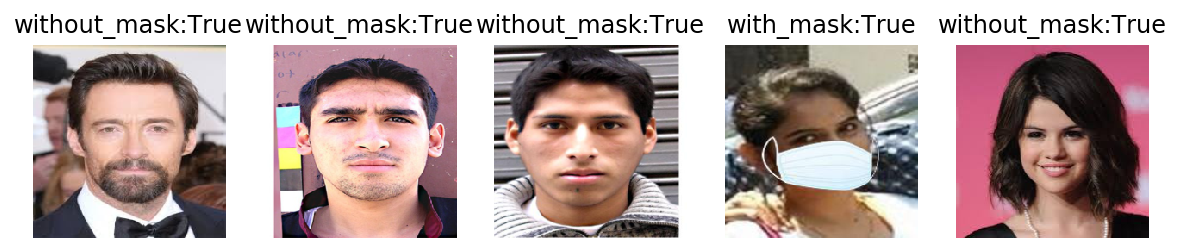

In [31]:
to_pil= transforms.ToPILImage()
images,labels,classes=get_random_images(5)
fig=plt.figure(figsize=(10,10))

for i in range(len(images)):
    image=to_pil(images[i])
    index=predict_image(image)
    
    sub = fig.add_subplot(1, len(images), i+1)
    res = int(labels[i]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
    
plt.show()
    

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


without_mask


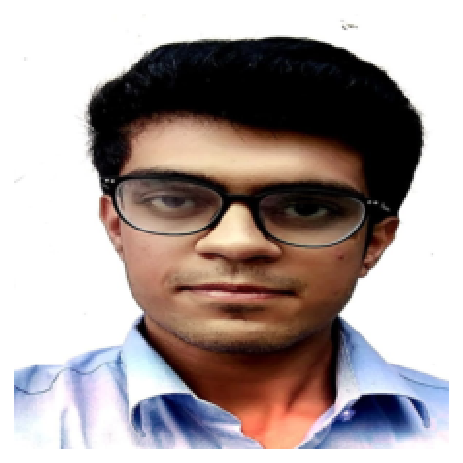

In [46]:
from PIL import Image
to_pil= transforms.ToPILImage()
check_transforms=transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.ToPILImage(),])
#path="data/train/with_mask/1-with-mask.jpg"
path='mask2.jpeg'
image=Image.open(path)

image=check_transforms(image)
index=predict_image(image)

sub = fig.add_subplot(1, 1, 1)
#res = int(labels[i]) == index
print(str(classes[index]))
sub.set_title(str(classes[index]))
plt.axis('off')
plt.imshow(image)


